# Programming Assignment Continued(Part 3)
Raghav Juyal \
EP20BTECH11018

# Imports

In [1]:
import numpy as np
import scipy.optimize as sc_o
import matplotlib.pyplot as plt

# Part 3

[Use data generated in Part I with the following modification: Samples generated with \
the mean at corners (0,0) and (0,1) are assigned the label +1, and those corresponding \
to corners (1,1) and (1,0) are assigned the label -1.] \
(a) Optimize the problem P1 for various values of C. \
(b) Repeat Q2(a) and Q2(b) of Part II to obtain best C for the current problem \
(instead of k in kNN classifier) and the current dataset. \
(c) Make a comparison of the performance of the soft-margin SVM with best value of \
C and kNN with best k (for the current modified dataset), that is, which one \
performs better.

# Data Generation

In [2]:
np.random.seed(0)
centers = [[0,0],[0,1],[1,0],[1,1]]
variance = 0.3
number_of_samples = 30
classes = []

for center in centers:
    classes.append(np.random.normal(center,variance,(number_of_samples,2)))


In [3]:
Ytemp = []
count = 0
Ytemp.append([1]*number_of_samples)
Ytemp.append([1]*number_of_samples)
Ytemp.append([-1]*number_of_samples)
Ytemp.append([-1]*number_of_samples)

X = np.concatenate((classes[0],classes[1],classes[2],classes[3]))
Y = np.concatenate((Ytemp[0],Ytemp[1],Ytemp[2],Ytemp[3]))

shuffle_idx = np.random.permutation(len(X))
X = X[shuffle_idx]
Y = Y[shuffle_idx]

In [4]:

number_of_samplesTe = 200
classes = []

for center in centers:
    classes.append(np.random.normal(center,variance,(number_of_samplesTe,2)))

Ytemp = []
count = 0
Ytemp.append([1]*number_of_samplesTe)
Ytemp.append([1]*number_of_samplesTe)
Ytemp.append([-1]*number_of_samplesTe)
Ytemp.append([-1]*number_of_samplesTe)

Xte = np.concatenate((classes[0],classes[1],classes[2],classes[3]))
Yte = np.concatenate((Ytemp[0],Ytemp[1],Ytemp[2],Ytemp[3]))
shuffle_idx = np.random.permutation(len(Xte))
Xte = Xte[shuffle_idx]
Yte = Yte[shuffle_idx]

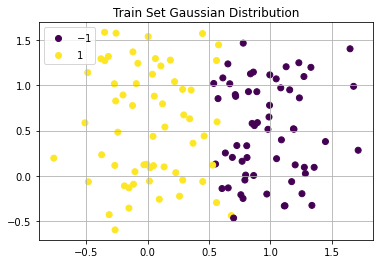

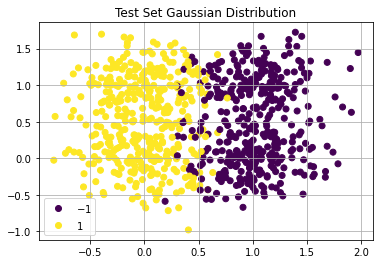

In [5]:
plt.grid()
plt.title("Train Set Gaussian Distribution")
scatter = plt.scatter(X[:,0],X[:,1],c=Y)
plt.legend(*scatter.legend_elements())
plt.show()
plt.grid()
plt.title("Test Set Gaussian Distribution")
scatter = plt.scatter(Xte[:,0],Xte[:,1],c=Yte)
plt.legend(*scatter.legend_elements())
plt.show()

# 3 (a)

In [6]:



def soft_margin_fit(X, Y, C=1.0):
    
    # Minimize: lambda * ||w||^2 + C * sum(zeta_i)
    # where zeta_i >= 1 - y_i(w^T x_i + b) and zeta_i >= 0
    # Here lambda = 1
    
    d = X.shape[1] # d dimensions
    def cost(parameters):
        return 1*np.linalg.norm(parameters[:-1])**2 + C * np.sum(np.maximum(0, 1 - Y * (np.matmul(X, parameters[:-1]) - parameters[-1])))
    
    return sc_o.minimize(cost, np.zeros(d+1))

In [7]:
parameters1 = soft_margin_fit(X, Y, C = 10)
parameters1 = parameters1.x
print(parameters1)

[-5.77782336e+00 -6.17072990e-04 -3.04381781e+00]


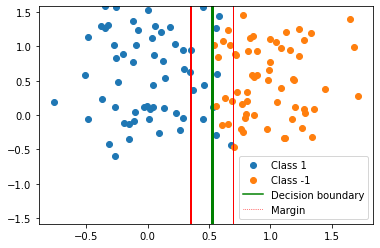

In [8]:
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], label='Class 1')
plt.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], label='Class -1')
plt.plot(X[:, 0], -parameters1[0]*X[:, 0]/parameters1[1] + parameters1[-1]/parameters1[1], label='Decision boundary', color='green')
plt.plot(X[:, 0], -parameters1[0]*X[:, 0]/parameters1[1] + parameters1[-1]/parameters1[1] + 1/parameters1[1], color='red', ls=':', lw=0.7)
plt.plot(X[:, 0], -parameters1[0]*X[:, 0]/parameters1[1] + parameters1[-1]/parameters1[1] - 1/parameters1[1], color='red', ls=':', lw=0.7, label='Margin')
plt.ylim(-max(abs(X[:, 1])), max(abs(X[:, 1])))
plt.legend()
plt.show()

In [9]:
Y_pred = np.sign(np.dot(Xte, parameters1[:-1]) - parameters1[-1])
accuracy = np.count_nonzero(Y_pred == Yte) / Yte.shape[0]

print('Accuracy: ', accuracy*100)

Accuracy:  95.5


In [10]:
def hold_outCVSoftMargin(X, Y, C, n_rep, rho):
    n = len(X)
    n_hold_out = int(n*rho)
    hold_out_accuracy = np.zeros(n_rep)
    train_accuracy = np.zeros(n_rep)
    for i in range(n_rep):
        shuffle_idx = np.random.permutation(n)
        X_tr = X[shuffle_idx]
        Y_tr = Y[shuffle_idx]
        X_hold_out = X_tr[:n_hold_out]
        Y_hold_out = Y_tr[:n_hold_out]
        X_tr = X_tr[n_hold_out:]
        Y_tr = Y_tr[n_hold_out:]
        parameters = soft_margin_fit(X, Y, C = 10).x
        Y_pred_hold_out = np.sign(np.dot(X_hold_out, parameters[:-1]) - parameters[-1])
        hold_out_accuracy[i] = np.count_nonzero(Y_hold_out == Y_pred_hold_out)/len(Y_hold_out)
        Y_pred_train = np.sign(np.dot(X_tr, parameters[:-1]) - parameters[-1])
        train_accuracy[i] = np.count_nonzero(Y_tr == Y_pred_train)/len(Y_tr)
        
        
    return np.round([np.mean(hold_out_accuracy)*100, np.mean(train_accuracy)*100], 2)

In [11]:
accuracies = []
for C in range(1, 30):
    acc = hold_outCVSoftMargin(X, Y, C, 10, 0.3)
    print("C = ", C, ": ", acc)
    accuracies.append(acc)

C =  1 :  [93.61 95.6 ]
C =  2 :  [94.44 95.24]
C =  3 :  [95.56 94.76]
C =  4 :  [94.17 95.36]
C =  5 :  [95.28 94.88]
C =  6 :  [95. 95.]
C =  7 :  [93.89 95.48]
C =  8 :  [93.89 95.48]
C =  9 :  [95.28 94.88]
C =  10 :  [95. 95.]
C =  11 :  [96.11 94.52]
C =  12 :  [94.72 95.12]
C =  13 :  [95.56 94.76]
C =  14 :  [95.28 94.88]
C =  15 :  [96.11 94.52]
C =  16 :  [92.5  96.07]
C =  17 :  [94.17 95.36]
C =  18 :  [93.89 95.48]
C =  19 :  [95.83 94.64]
C =  20 :  [96.94 94.17]
C =  21 :  [94.17 95.36]
C =  22 :  [94.44 95.24]
C =  23 :  [93.33 95.71]
C =  24 :  [93.33 95.71]
C =  25 :  [94.17 95.36]
C =  26 :  [95. 95.]
C =  27 :  [95.56 94.76]
C =  28 :  [93.89 95.48]
C =  29 :  [96.94 94.17]


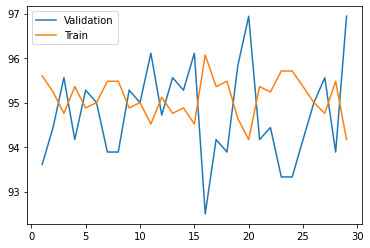

In [12]:
plt.plot(range(1, 30), [acc[0] for acc in accuracies], label="Validation")
plt.plot(range(1, 30), [acc[1] for acc in accuracies], label="Train")
plt.legend()
plt.show()

In [13]:
C_best = np.argmax([x[0] for x in accuracies])+1
print('C = ', C_best, 'is the best C ')


C =  20 is the best C 


# 3 (b)

In [14]:
best_C = []
for rho in [0.1, 0.3, 0.5, 0.7, 0.9]:
    accuracies = []
    for C in range(1, 30):
        acc = hold_outCVSoftMargin(X, Y, C, 10, rho)
        accuracies.append(acc)  
    best_C.append(np.argmax([x[0] for x in accuracies])+1)
    print('Rho = ' + str(rho) + ': best C = ', best_C[-1])

Rho = 0.1: best C =  29
Rho = 0.3: best C =  27
Rho = 0.5: best C =  16
Rho = 0.7: best C =  18
Rho = 0.9: best C =  5


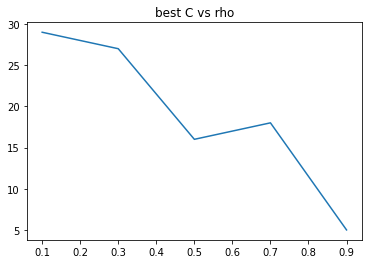

In [15]:
plt.title("best C vs rho")
plt.plot([0.1, 0.3, 0.5, 0.7, 0.9], best_C)
plt.show()

In [16]:
best_C = []
for n_rep in [1, 10, 20, 30, 50]:
    accuracies = []
    for C in range(1, 30):
        acc = hold_outCVSoftMargin(X, Y, C, n_rep, 0.3)
        accuracies.append(acc) 
    best_C.append(np.argmax([x[0] for x in accuracies])+1)
    print('N_rep = ' + str(n_rep) + ': best C = ', best_C[-1])

N_rep = 1: best C =  2
N_rep = 10: best C =  23
N_rep = 20: best C =  4
N_rep = 30: best C =  24
N_rep = 50: best C =  2


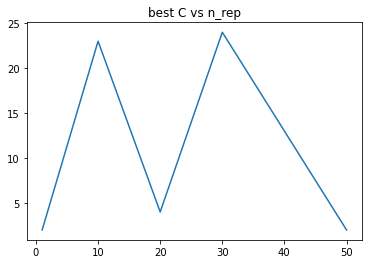

In [17]:
plt.title("best C vs n_rep")
plt.plot([1, 10, 20, 30, 50], best_C)
plt.show()

From the plots we see how k varies with rho and n_rep.

# 3 (c)

In [18]:
def kNNClassify(k,X_train,Y_train,X_test):
    neighbors = []
    ts = 1
    for x in X_test:
        distances = np.sqrt(np.sum((x-X_train)**2,axis=1))
        Y_sorted = [y for _, y in sorted(zip(distances, Y_train))]
        neighbors.append(Y_sorted[:k])
    
    for i in range(len(neighbors)):
        # print(neighbors[i])
        neighbors[i] = max(set(neighbors[i]), key=neighbors[i].count)
        
    return neighbors

In [19]:
def hold_outCVkNN(X, Y, k, n_rep, rho):
    n = len(X)
    n_hold_out = int(n*rho)
    hold_out_accuracy = np.zeros(n_rep)
    train_accuracy = np.zeros(n_rep)
    for i in range(n_rep):
        shuffle_idx = np.random.permutation(n)
        X_tr = X[shuffle_idx]
        Y_tr = Y[shuffle_idx]
        X_hold_out = X_tr[:n_hold_out]
        Y_hold_out = Y_tr[:n_hold_out]
        X_tr = X_tr[n_hold_out:]
        Y_tr = Y_tr[n_hold_out:]
        Y_pred_hold_out = kNNClassify(k,X_tr, Y_tr, X_hold_out)
        hold_out_accuracy[i] = np.count_nonzero(Y_hold_out == Y_pred_hold_out)/len(Y_hold_out)
        Y_pred_train = kNNClassify(k,X_tr, Y_tr, X_tr)
        train_accuracy[i] = np.count_nonzero(Y_tr == Y_pred_train)/len(Y_tr)
        
        
    return np.round([np.mean(hold_out_accuracy)*100, np.mean(train_accuracy)*100], 2)

In [20]:
accuracies = []
for k in range(1, 23, 2):
    acc = hold_outCVkNN(X, Y, k, 10, 0.3)
    print("k = ", k, ": ", acc)
    accuracies.append(acc)

k =  1 :  [ 93.61 100.  ]
k =  3 :  [95.56 97.38]
k =  5 :  [95.28 96.31]
k =  7 :  [93.06 96.19]
k =  9 :  [93.89 95.48]
k =  11 :  [91.39 94.52]
k =  13 :  [93.33 94.64]
k =  15 :  [93.89 93.45]
k =  17 :  [90.83 94.76]
k =  19 :  [93.06 94.64]
k =  21 :  [91.94 94.52]


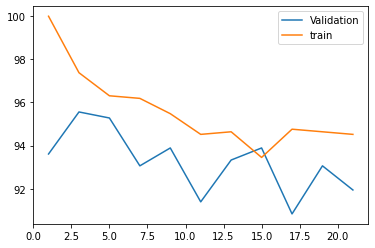

In [21]:
plt.plot(range(1, 23, 2), [acc[0] for acc in accuracies], label="Validation")
plt.plot(range(1, 23, 2), [acc[1] for acc in accuracies], label="train")
plt.legend()
plt.show()

In [22]:
k_best = np.argmax([x[0] for x in accuracies])*2+1
print('k = ', k_best, 'is the best k ')

k =  3 is the best k 


In [23]:
Y_p = kNNClassify(k_best,X,Y,Xte)
accuracy_knn = np.count_nonzero(Yte == Y_p)*100/len(Yte)
print(f"Accuracy for KNN: {accuracy_knn}")

Accuracy for KNN: 93.875


In [24]:
parameters = soft_margin_fit(X, Y, C_best).x
Y_pred_SVM = np.sign(np.dot(Xte, parameters[:-1]) - parameters[-1])
accuracy_svm = np.count_nonzero(Y_pred_SVM == Yte)*100 / Yte.shape[0]
print(f"Accuracy for SVM: {accuracy_svm}")

Accuracy for SVM: 95.25


From this we can see that in this case the accuracy of soft-margin SVM with best value of C is better \
than kNN with best k.